In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [89]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [127]:
from collections import Counter
import pandas as pd

def describe_answer(path='./data/mc500.test.ans'):
    ans_lst = []
    with open(path) as f:
        for line in f:
            ans_lst.extend(line.strip().split())
    ans_ser = pd.Series(ans_lst).value_counts()
    ans_des_ser = ans_ser/ans_ser.sum()
    print('Answer Path:', path)
    print(ans_des_ser)
    print()
    return ans_des_ser

def describe_lst(lst, original=False):
    ser = pd.Series(lst).value_counts()
    ser_des = ser/ser.sum()
    print (ser_des)
    print ()
    if not original:
        return ser_des
    else:
        return ser

In [4]:

ans_dct = Counter(ans_lst)
ans_dct

Counter({'A': 141, 'B': 146, 'C': 145, 'D': 168})

In [144]:
train_des = describe_answer('./data/mc500.train.ans')
dev_des = describe_answer('./data/mc500.dev.ans')
test_des = describe_answer('./data/mc500.test.ans')

Answer Path: ./data/mc500.train.ans
D    0.271667
C    0.252500
A    0.240000
B    0.235833
dtype: float64

Answer Path: ./data/mc500.dev.ans
A    0.275
C    0.275
B    0.250
D    0.200
dtype: float64

Answer Path: ./data/mc500.test.ans
D    0.280000
B    0.243333
C    0.241667
A    0.235000
dtype: float64



In [140]:
describe_answer('./data/mc160.train.ans')
describe_answer('./data/mc160.dev.ans')
describe_answer('./data/mc160.test.ans')

Answer Path: ./data/mc160.train.ans
C    0.292857
A    0.253571
B    0.228571
D    0.225000
dtype: float64

Answer Path: ./data/mc160.dev.ans
C    0.316667
B    0.291667
D    0.241667
A    0.150000
dtype: float64

Answer Path: ./data/mc160.test.ans
C    0.275000
B    0.250000
D    0.241667
A    0.233333
dtype: float64



C    0.275000
B    0.250000
D    0.241667
A    0.233333
dtype: float64

In [146]:
import json
with open('./correct_160.json', encoding='utf8') as f:
    correct = json.load(f)
correct
with open('./wrong_160.json', encoding='utf8') as f:
    wrong = json.load(f)
wrong
len(correct)/(len(correct) + len(wrong))

0.23333333333333334

In [147]:
import json
with open('./correct_500.json', encoding='utf8') as f:
    correct = json.load(f)
correct
with open('./wrong_500.json', encoding='utf8') as f:
    wrong = json.load(f)
wrong
len(correct)/(len(correct) + len(wrong))

0.21166666666666667

In [184]:
import json
with open('./correct_500.json', encoding='utf8') as f:
    correct = json.load(f)
correct
with open('./wrong_500.json', encoding='utf8') as f:
    wrong = json.load(f)
wrong
len(correct)/(len(correct) + len(wrong))

0.21666666666666667

In [185]:
a = ([x[3] for x in wrong]) + ([x[3] for x in correct])
pred_test_des = describe_lst(a)

0    0.748333
2    0.121667
1    0.073333
3    0.056667
dtype: float64



In [186]:
pred_test_des

0    0.748333
2    0.121667
1    0.073333
3    0.056667
dtype: float64

In [187]:
pred_test_des = pred_test_des.rename(dict(zip(range(4), ['A', 'B', 'C', 'D'])))

In [188]:
pred_test_des.reset_index()

,index,0
0,A,0.748333
1,C,0.121667
2,B,0.073333
3,D,0.056667


In [189]:
(train_des.reset_index()
 .merge(dev_des.reset_index(), on='index')
 .merge(test_des.reset_index(), on='index'))

,index,0_x,0_y,0
0,D,0.271667,0.200,0.280000
1,C,0.252500,0.275,0.241667
2,A,0.240000,0.275,0.235000
3,B,0.235833,0.250,0.243333


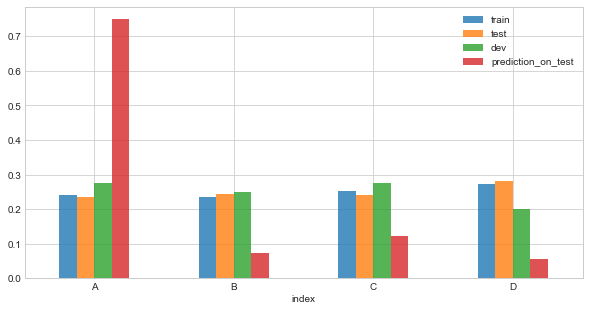

In [190]:
plot = (train_des.reset_index().rename(columns={0:'train'})
 .merge(test_des.reset_index().rename(columns={0:'test'}), on='index')
 .merge(dev_des.reset_index().rename(columns={0:'dev'}), on='index')
 .merge(pred_test_des.reset_index().rename(columns={0:'prediction_on_test'}), on='index')
 .set_index('index')
 .sort_index()
 .plot(kind='bar', alpha=.8, figsize=(10,5), rot=0))
fig = plot.get_figure()
fig.savefig("choice_des.png", dpi=400)

In [191]:
test_data = {}
with open('./data/mc500.test.tsv', encoding='utf-8') as f:
    for line in f:
        obj = json.loads(line)
        test_data[obj['id']] = obj

what     0.516667
who      0.126667
other    0.105000
why      0.103333
where    0.096667
which    0.040000
when     0.011667
dtype: float64

what     0.484615
other    0.169231
where    0.107692
who      0.100000
why      0.084615
which    0.046154
when     0.007692
dtype: float64



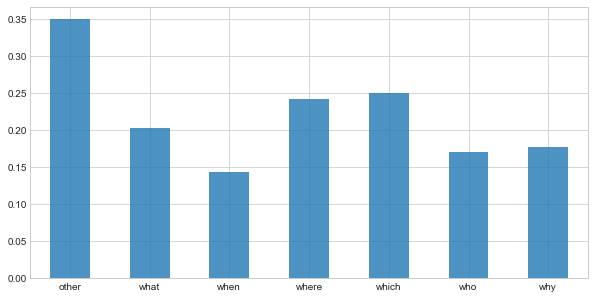

In [193]:
correct_info = []
for case in correct:
    obj = test_data[case[0]]
    qa_obj = obj['questions'][case[1]]
    q_type = qa_obj['tokens'][0].lower()
    if q_type in ['what', 'when', 'where', 'which', 'who', 'why']:
        correct_info.append(q_type)
    else:
        correct_info.append('other')
        
q_type_lst = []
for obj in test_data.values():
    for qa_obj in obj['questions']:
        q_type = qa_obj['tokens'][0].lower()
        if q_type in ['what', 'when', 'where', 'which', 'who', 'why']:
            q_type_lst.append(q_type)
        else:
            q_type_lst.append('other')
q_type_dct = Counter(q_type_lst)    
test_q_type = describe_lst(q_type_lst, True)
pred_q_type = describe_lst(correct_info, True)
ax = pred_q_type.div(test_q_type, fill_value=0).plot(kind='bar', alpha=.8, rot=0, figsize=(10, 5))
fig = ax.get_figure()
fig.savefig("q_type_break.png", dpi=400)

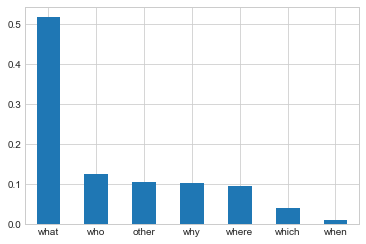

In [176]:
(test_q_type/test_q_type.sum()).plot(kind='bar', rot=0)

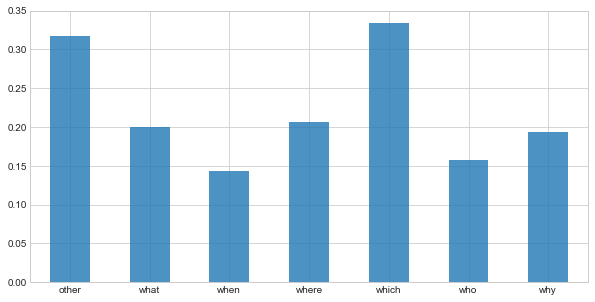

In [181]:
list(test_data.values())[0]

{'description': 'Author: 3263425784;Work Time(s): 1151;Qual. score: 95;Creativity Words: shoe,pillow,kick,noodle,leg,rinse,bye,stairway,butt,button,gum,shouting,telephone,die,eat',
 'id': 'mc500.test.0',
 'passage': ['It',
  'was',
  'Sally',
  "'s",
  'birthday',
  'She',
  'was',
  'very',
  'excited',
  'She',
  'was',
  'going',
  'to',
  'have',
  'a',
  'sleepover',
  'at',
  'her',
  'house',
  'for',
  'her',
  'birthday',
  'She',
  'invited',
  'all',
  'of',
  'her',
  'best',
  'friends',
  'The',
  'party',
  'was',
  'at',
  '1',
  'on',
  'Saturday',
  'Jessica',
  'Erin',
  'and',
  'Cathy',
  'all',
  'arrived',
  'at',
  '1',
  'but',
  'Jennifer',
  'was',
  'late',
  'She',
  'did',
  'not',
  'come',
  'until',
  '2',
  'because',
  'she',
  'could',
  'not',
  'find',
  'her',
  'other',
  'shoe',
  'The',
  'first',
  'thing',
  'they',
  'all',
  'did',
  'was',
  'go',
  'swimming',
  'in',
  'her',
  'pool',
  'They',
  'had',
  'so',
  'much',
  'fun',
  'The

multiple    0.546667
one         0.453333
dtype: float64

one         0.507692
multiple    0.492308
dtype: float64

multiple    0.195122
one         0.242647
dtype: float64


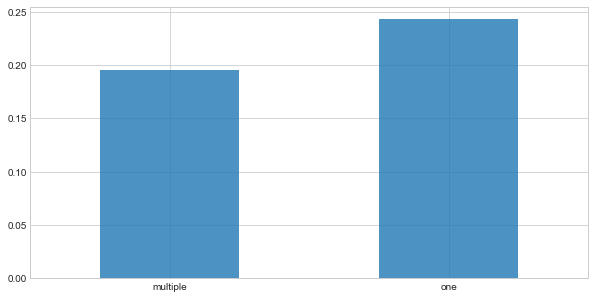

In [195]:
correct_info = []
for case in correct:
    obj = test_data[case[0]]
    qa_obj = obj['questions'][case[1]]
    q_type = qa_obj['type']
    correct_info.append(q_type)
        
q_type_lst = []
for obj in test_data.values():
    for qa_obj in obj['questions']:
        q_type = qa_obj['type']
        q_type_lst.append(q_type)
        
q_type_dct = Counter(q_type_lst)    
test_q_type = describe_lst(q_type_lst, True)
pred_q_type = describe_lst(correct_info, True)
print (pred_q_type.div(test_q_type, fill_value=0))
pred_q_type.div(test_q_type, fill_value=0).plot(kind='bar', alpha=.8, rot=0, figsize=(10, 5))

In [200]:
acc_trend = pd.read_csv('./tmp.txt', names=['train_acc', 'test_acc'])

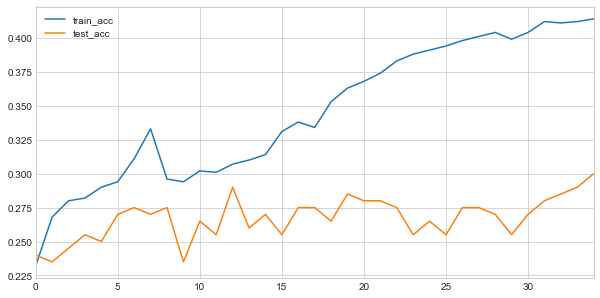

In [205]:
plot = acc_trend.plot(kind='line', figsize=(10, 5))
fig = plot.get_figure()
fig.savefig('acc_trend', dpi=400)